<a href="https://colab.research.google.com/github/jay-thakur/Fake_News_Classifier/blob/main/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset



In [187]:
cd '/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier/'

/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier


In [188]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import torch
import torch.nn as nn

# Load the dataset

In [189]:
true_dataset = pd.read_csv('data/True.csv') 
fake_dataset = pd.read_csv('data/Fake.csv') 

In [190]:
true_dataset.shape

(21417, 4)

In [191]:
true_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [192]:
true_dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [193]:
fake_dataset.shape

(23481, 4)

In [194]:
fake_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [195]:
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [196]:
true_dataset["label"] = np.ones(true_dataset.shape[0], dtype=int)
true_dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [197]:
fake_dataset["label"] = np.zeros(fake_dataset.shape[0], dtype=int)
fake_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [198]:
dataset = pd.concat((true_dataset, fake_dataset), axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [199]:
dataset = dataset.sample(frac=1)
dataset.head()

,title,text,subject,date,label
18373,TUCKER CARLSON Asks How Hypocrite Maxine Water...,Maxine Waters is so filled with hate for anyon...,left-news,"Jul 6, 2017",0
10400,Greg Gutfeld Scores a Priceless TV Moment…Wear...,Greg Gutfeld scored a priceless TV moment duri...,politics,"Jul 15, 2017",0
1196,"Republican Cochran back in Senate, says ready ...",WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"October 17, 2017",1
2275,"DESPERATE: Trump Doubles Down On Wiretap Lie,...","Usually, if you re in a hole you stop digging ...",News,"March 5, 2017",0
22587,Hillary Clinton: Neocon War-Hawk in Waiting,Robert Parry Consortium NewsIf there were any...,US_News,"April 17, 2016",0


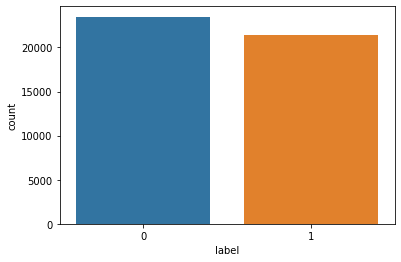

In [200]:
sns.countplot(dataset['label'])
plt.show()

In [201]:
dataset['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [202]:
df = pd.get_dummies(dataset, columns=["subject"])
df.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
18373,TUCKER CARLSON Asks How Hypocrite Maxine Water...,Maxine Waters is so filled with hate for anyon...,"Jul 6, 2017",0,0,0,0,0,1,0,0,0
10400,Greg Gutfeld Scores a Priceless TV Moment…Wear...,Greg Gutfeld scored a priceless TV moment duri...,"Jul 15, 2017",0,0,0,0,0,0,1,0,0
1196,"Republican Cochran back in Senate, says ready ...",WASHINGTON (Reuters) - Republican U.S. Senator...,"October 17, 2017",1,0,0,0,0,0,0,1,0
2275,"DESPERATE: Trump Doubles Down On Wiretap Lie,...","Usually, if you re in a hole you stop digging ...","March 5, 2017",0,0,0,1,0,0,0,0,0
22587,Hillary Clinton: Neocon War-Hawk in Waiting,Robert Parry Consortium NewsIf there were any...,"April 17, 2016",0,0,0,0,1,0,0,0,0


In [203]:
df = df.drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 18373 to 10152
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 3.0+ MB


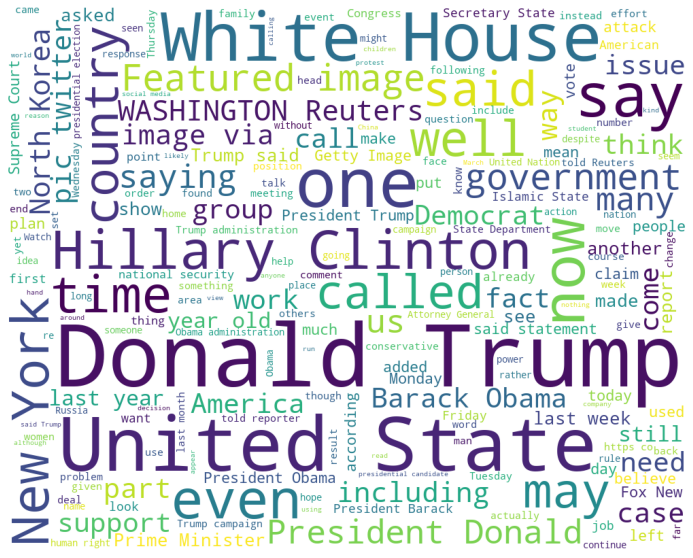

In [204]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [205]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocess the data

In [206]:
def preprocess(data):
  pattern = "[^a-zA-Z]"
  lemmatizer = WordNetLemmatizer()
  new = []
  for txt in data:
    txt = txt.lower()
    txt = re.sub(pattern, " ", txt)
    txt = word_tokenize(txt)
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = " ".join(txt)
    new.append(txt)
  return new

In [207]:
text_new = preprocess(df.text)
text_new[0]

'maxine water is so filled with hate for anyone who disagrees with her that she s decided to appoint herself a the democrat s chief attack dog for president trump and his administration unfortunately for maxine making a public spectacle of herself also come with a price speaking of a price how about the price tag on career politician maxine water million mansion tucker carlson reacted to rep maxine water d calif threat to take hud secretary dr ben carson s a apart by noting she might indeed be qualified to take his job carlson said water a year politician life in a square foot mansion worth million that is not in her congressional district he asked how water could afford a home like that in a ritzy neighborhood while solely working a a representative of the rd district we should take her seriously on this subject carlson said calling her a confirmed expert on the question on housing he said that while water sometimes speaks using racially charged rhetoric she life in a neighborhood tha

In [208]:
title_new = preprocess(df.title)
title_new[0]

'tucker carlson asks how hypocrite maxine water affords million mansion after yr in congress'

In [209]:
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)

title_vector = title_vectorizer.fit_transform(title_new).toarray() 
text_vector = text_vectorizer.fit_transform(text_new).toarray()

In [210]:
df.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
18373,TUCKER CARLSON Asks How Hypocrite Maxine Water...,Maxine Waters is so filled with hate for anyon...,0,0,0,0,0,1,0,0,0
10400,Greg Gutfeld Scores a Priceless TV Moment…Wear...,Greg Gutfeld scored a priceless TV moment duri...,0,0,0,0,0,0,1,0,0
1196,"Republican Cochran back in Senate, says ready ...",WASHINGTON (Reuters) - Republican U.S. Senator...,1,0,0,0,0,0,0,1,0
2275,"DESPERATE: Trump Doubles Down On Wiretap Lie,...","Usually, if you re in a hole you stop digging ...",0,0,0,1,0,0,0,0,0
22587,Hillary Clinton: Neocon War-Hawk in Waiting,Robert Parry Consortium NewsIf there were any...,0,0,0,0,1,0,0,0,0


In [211]:
df.drop(["title","text"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 18373 to 10152
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.3 MB


In [212]:
print(df.shape)
print(title_vector.shape)
print(text_vector.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [213]:
X = np.concatenate((np.array(df.drop("label", axis=1)), title_vector, text_vector), axis=1)
y = df['label']

In [214]:
print(X.shape)
print(y.shape)

(44898, 5008)
(44898,)


# Divide the dataset

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31428, 5008)
(13470, 5008)
(31428,)
(13470,)


# Logistic Regression

It models the probabilities of classification problem with two possible outcomes. it value ranges from 0 to 1. The logistic function is defind as - 

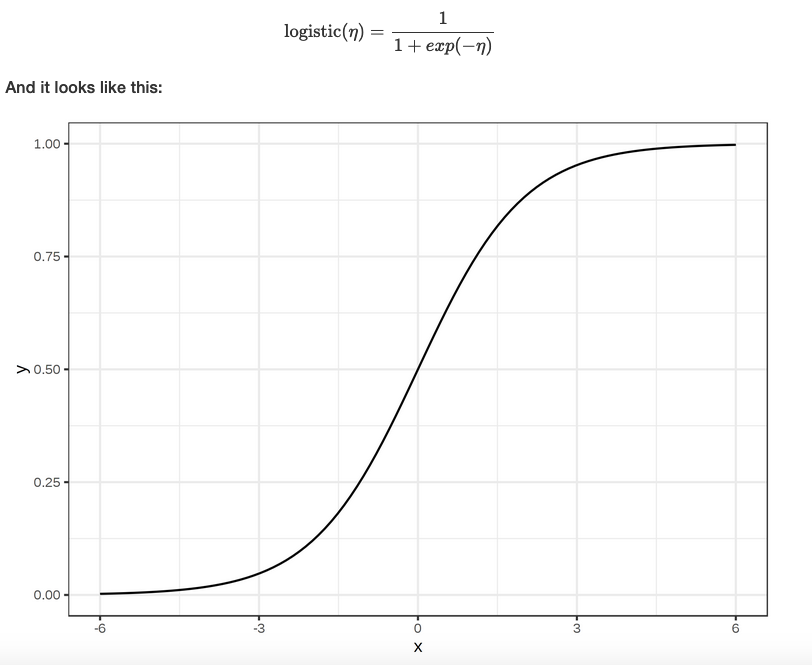

accuracy: 99.896


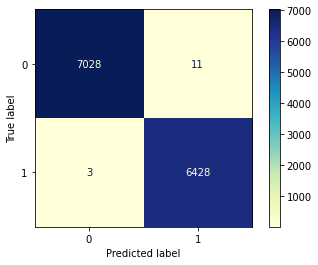

In [216]:
lr_model = LogisticRegression(max_iter=900)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("accuracy: %0.3f" %(lr_acc*100))

plot_confusion_matrix(lr_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

# cm = confusion_matrix(y_test, lr_pred)
# sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2%')
# plt.show()

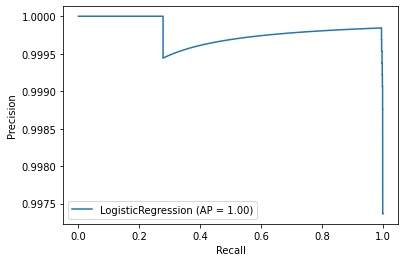

In [217]:
plot_precision_recall_curve(lr_model, X_test, y_test)
plt.show()

# Decision Tree Classifier

it uses a tree like structure and their possible combinations to solve a particular problem.

A decision tree consists of a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

While implementing the Decision-Tree algorithm, We make following assumptions -

* At the beginning, the whole training set is considered as the root.
* Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

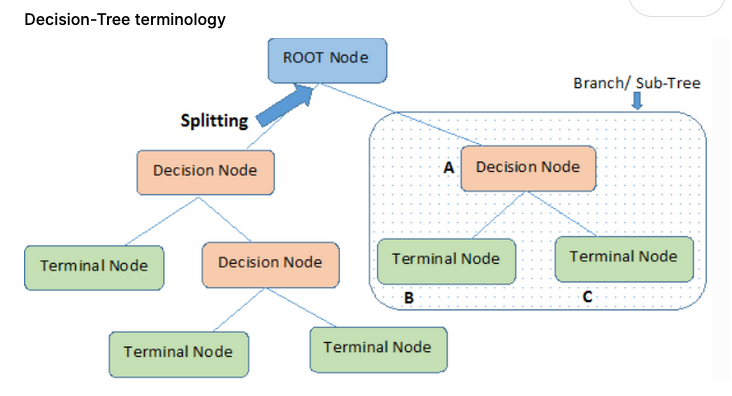


accuracy: 100.000


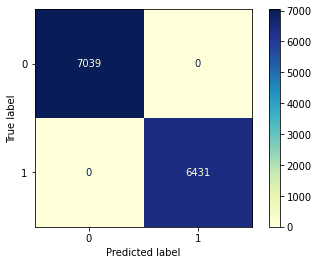

In [218]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("accuracy: %0.3f" %(dt_acc*100))

plot_confusion_matrix(dt_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

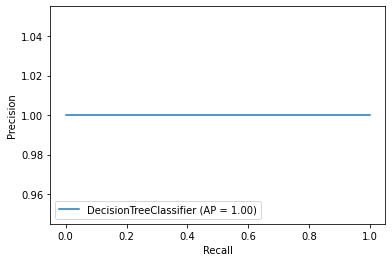

In [219]:
plot_precision_recall_curve(dt_model, X_test, y_test)
plt.show()

# Random Forest Classifier

Random forest is made up of several trees & select the best soluction democratically (by voting).

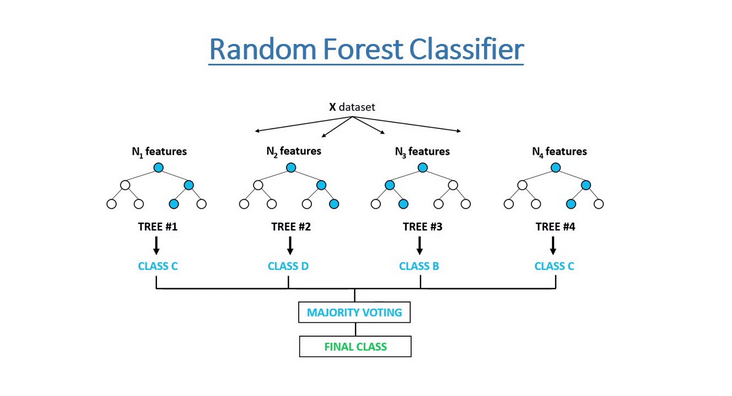

accuracy: 99.955


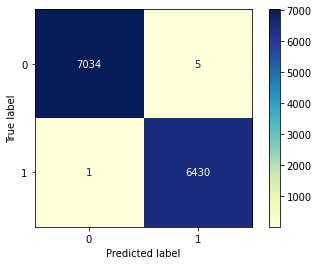

In [220]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("accuracy: %0.3f" %(rf_acc*100))

plot_confusion_matrix(rf_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

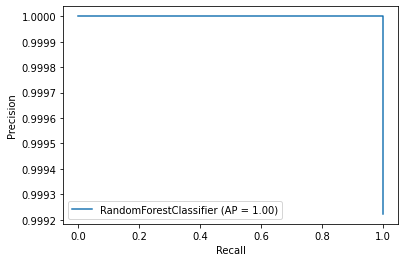

In [221]:
plot_precision_recall_curve(rf_model, X_test, y_test)
plt.show()

# Naive Bayes

Niave bayes assumes that all the features are independent. it uses the Baye's algorithm to predict probabilities of each class.

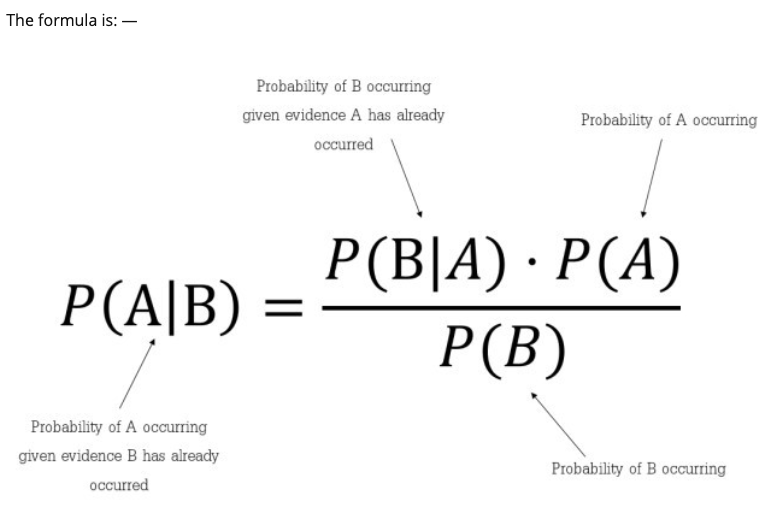

* Gaussian Naive Bayes
* Multinomial Naive Bayes

accuracy: 96.548


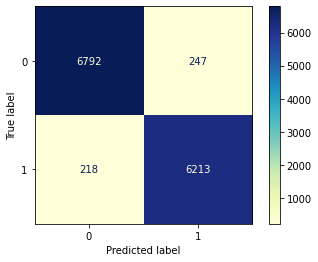

In [222]:
nbc_model = MultinomialNB()
nbc_model.fit(X_train, y_train)
nbc_pred = nbc_model.predict(X_test)

nbc_acc = accuracy_score(y_test, nbc_pred)
print("accuracy: %0.3f" %(nbc_acc*100))

plot_confusion_matrix(nbc_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

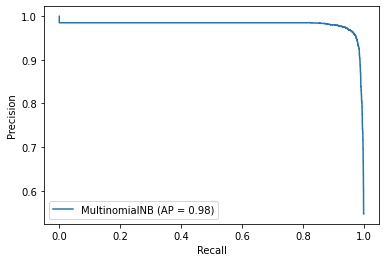

In [223]:
plot_precision_recall_curve(nbc_model, X_test, y_test)
plt.show()

alpha: 1e-06, accuracy : 98.12175204157387
alpha: 1e-05, accuracy : 97.94357832219748
alpha: 0.0001, accuracy : 97.66146993318485
alpha: 0.001, accuracy : 97.42390497401632
alpha: 0.01, accuracy : 97.21603563474387
alpha: 0.1, accuracy : 96.9042316258352
alpha: 1, accuracy : 96.5478841870824


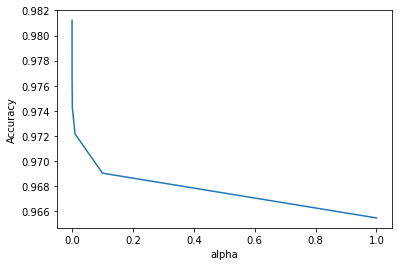

In [224]:
alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mnb_acc = []
for alpha in alpha_values:
    nbc_model_a = MultinomialNB(alpha)
    nbc_model_a.fit(X_train, y_train)
    nbc_a_pred = nbc_model_a.predict(X_test)
    acc = accuracy_score(y_test, nbc_a_pred)
    mnb_acc.append(acc)
    print(f'alpha: {alpha}, accuracy : {acc*100}')

sns.lineplot(alpha_values, mnb_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

# ANN

Artificial Neural Network is a multi-layer fully connected neural network that consists of an input layer, multiple hidden layer, and an output layer. Every node in a layer is connected to every other node in the next layer.

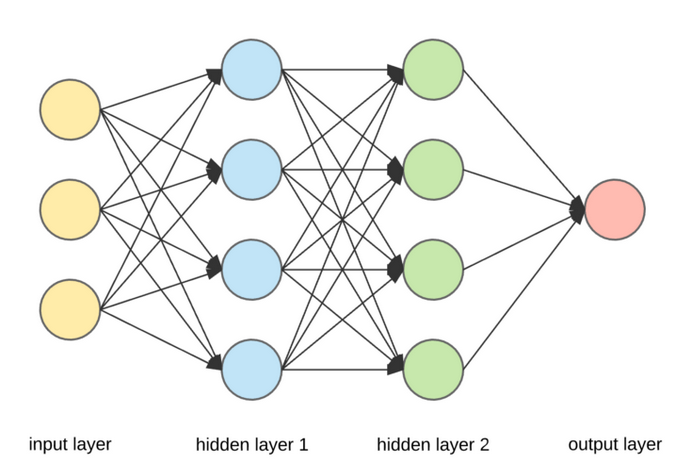


Each node works like this. 
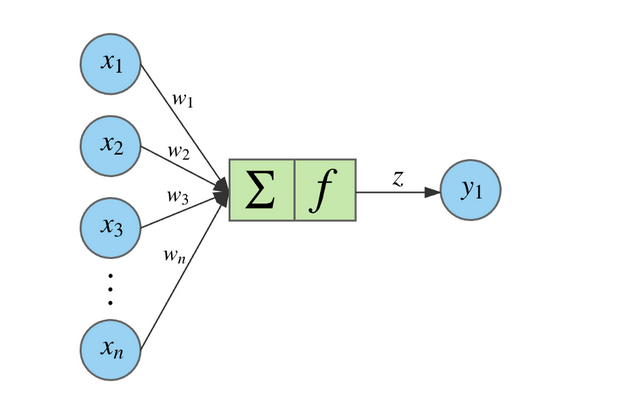

## Activation Layer
the activation function of a node defines the output of that node given an input or set of inputs. perform a transformation on the input received, in order to keep values within a manageable range.
### ReLu

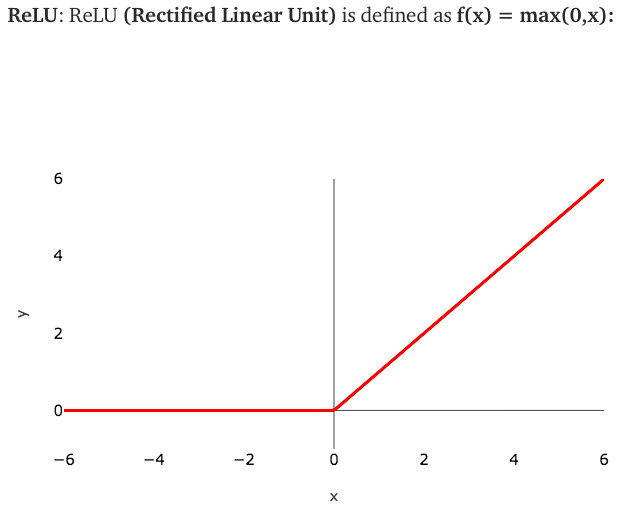

## Dropout Layer

Dropout layer is used to prevent overfitting. dropout means ingore these units. those units wont be considered for forward & backward pass.

In [225]:
class Simple_Net(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net,self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 20)
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        
        return out
    

model = Simple_Net()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

Epoch : 0, Loss : 0.7048634886741638
Epoch : 1, Loss : 8.96366024017334
Epoch : 2, Loss : 2.459717035293579
Epoch : 3, Loss : 0.6946945190429688
Epoch : 4, Loss : 0.6519129276275635
Epoch : 5, Loss : 0.5426777005195618
Epoch : 6, Loss : 0.4486519992351532
Epoch : 7, Loss : 0.3882611095905304
Epoch : 8, Loss : 0.35207489132881165
Epoch : 9, Loss : 0.323760062456131
Epoch : 10, Loss : 0.30316564440727234
Epoch : 11, Loss : 0.28754907846450806
Epoch : 12, Loss : 0.2784520089626312
Epoch : 13, Loss : 0.27156007289886475
Epoch : 14, Loss : 0.26486751437187195
Epoch : 15, Loss : 0.25799259543418884
Epoch : 16, Loss : 0.25273433327674866
Epoch : 17, Loss : 0.24777327477931976
Epoch : 18, Loss : 0.24391192197799683
Epoch : 19, Loss : 0.2403651624917984


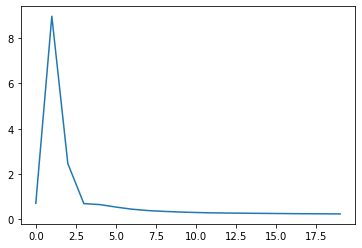

In [226]:
X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 20

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch}, Loss : {loss}')

plt.plot(losses)

accuracy : 99.10170749814402%


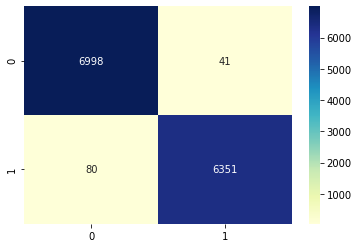

In [227]:
y_hat = model(X_test)
y_pred = torch.max(y_hat, 1)[1] # Convert pred into labels
nn_acc = accuracy_score(y_pred, y_test)
print(f'accuracy : {nn_acc*100}%')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

### Experiment

**HyperParameter Tuning** - is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. for example learning rate, batch size

**Overfitting** - When out model performs poor on unseen data, means gives high accuracy on train data but less accuracy on test data, that is called as overfitting.

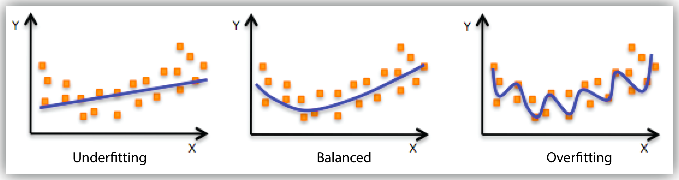


Epoch : 1, Loss : 0.6940371990203857
Epoch : 2, Loss : 2.5086867809295654
Epoch : 3, Loss : 0.7145798802375793
Epoch : 4, Loss : 0.6802588701248169
Epoch : 5, Loss : 0.7004673480987549
Epoch : 6, Loss : 0.6908754706382751
Epoch : 7, Loss : 0.6948263049125671
Epoch : 8, Loss : 0.6947999000549316
Epoch : 9, Loss : 0.6950713992118835
Epoch : 10, Loss : 0.6951100826263428
Epoch : 11, Loss : 0.6953628659248352
Epoch : 12, Loss : 0.6953625679016113
Epoch : 13, Loss : 0.6951014399528503
Epoch : 14, Loss : 0.6950616836547852
Epoch : 15, Loss : 0.6950024366378784
Epoch : 16, Loss : 0.6949869990348816
Epoch : 17, Loss : 0.6948970556259155
Epoch : 18, Loss : 0.6945208311080933
Epoch : 19, Loss : 0.6946476697921753
Epoch : 20, Loss : 0.6942823529243469
Epoch : 21, Loss : 0.6941575407981873
Epoch : 22, Loss : 0.6938591599464417
Epoch : 23, Loss : 0.6938652396202087
Epoch : 24, Loss : 0.6937351822853088
Epoch : 25, Loss : 0.6933930516242981
Epoch : 26, Loss : 0.6934992074966431
Epoch : 27, Loss : 0.

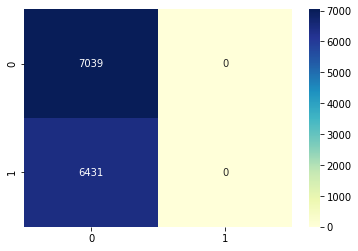

In [230]:
class Simple_Net1(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net1, self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 50)
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(50, 10)
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(10, 2)

        self.dropout = nn.Dropout(0.1)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        # out = self.dropout(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        out = self.relu5(out)

        out = self.linear6(out)
        
        return out
    

model_1 = Simple_Net1()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)
# y_train = torch.Tensor(y_train.type(torch.FloatTensor))

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 50

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model_1(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch+1}, Loss : {loss}')

y_hat = model_1(X_test)
y_pred = torch.max(y_hat,1)[1] # Convert pred into labels

nn_acc_4_hl = accuracy_score(y_pred, y_test)
print(f'accuracy on 4 hidden layer : {nn_acc_4_hl}')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

Experimented with many hidden layers & changing hyperparameters like learning rate, batchsize. also tried adding dropout layer. But the current network architecure gives best accuracy.

# Model Accuracies

In [ ]:
models_accuracies = pd.DataFrame([["Logistic Regression", lr_acc], ["Naive Bayes", nbc_acc], ["Decision Tree", dt_acc],
                       ["Random Forest", rf_acc], ["Simple ANN", nn_acc], ["Modified ANN", nn_acc_4_hl]], columns=["Model", "Accuracy"])
models_accuracies

In [ ]:
x = ['LR', 'DT', 'RF', 'NB', 'ANN', 'M-ANN']
y = [lr_acc, dt_acc, rf_acc, nbc_acc, nn_acc, nn_acc_4_hl]
sns.barplot(x, y)
plt.show()

## My Contribution

I have followed this to understand but visualised & implemented on my own. I also trined & checked accuracy on Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Naive Bayes (Multinomial NB) models.

## Challanges & solutions

Text preprocessing was a major challange. then implementing & finding good accurcy on different models was a challange too. 

Went through many articles to understand text preprocessing & for finding good accuracy.



## References

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98

http://datamine.unc.edu/jupyter/notebooks/Text%20Mining%20Modules/(1)%20Text%20Preprocessing.ipynb

https://en.wikipedia.org/wiki/Hyperparameter_optimization

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

https://christophm.github.io/interpretable-ml-book/logistic.html

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial

https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

https://en.wikipedia.org/wiki/Activation_function

https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

